###  Python e Finanças

Bibliotecas mais usadas:

- pandas
- matplotlib
- numpy
- datetime

Vamos usar também ferramentas para puxar cotações e afins:

- pandas_datareader
- yfinance

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Collecting yfinance
  Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.4.4-py311-none-any.whl (16 kB)



ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\sample.exe' -> 'c:\\Python311\\Scripts\\sample.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance



C:\Users\kaio.siqueira\AppData\Local\Temp\ipykernel_4124\436198144.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Referências:
- Índices:

^INDICE -> exemplo: ^BVSP (BOVESPA)

- Ações BR:

TICKER.SA -> exemplo: ITUB4.SA (ação ITUB4 da bolsa brasileira)

- Ações Internacionais:

TICKER -> exemplo: GOOG (ação do google na bolsa americana)

#### Analisando o IBOV

In [21]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

df_ibov = yfinance.download(["^BVSP"],data_inicial,data_final)['Adj Close']
df_ibov

[*********************100%%**********************]  1 of 1 completed


Date
2023-08-24    117026.0
2023-08-25    115837.0
2023-08-28    117121.0
2023-08-29    118404.0
2023-08-30    117535.0
                ...   
2024-08-12    131116.0
2024-08-13    132398.0
2024-08-14    133318.0
2024-08-15    134153.0
2024-08-16    133953.0
Name: Adj Close, Length: 245, dtype: float64

#### Analisando o Gráfico

<Axes: xlabel='Date'>

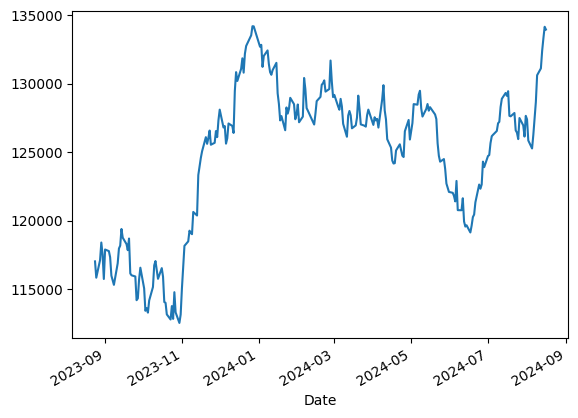

In [22]:
df_ibov.plot()

#### Retorno do IBOV

In [23]:
retorno_ibov = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print(f'Retorno de {retorno_ibov:.1%}')

Retorno de 14.5%


#### Média Móvel

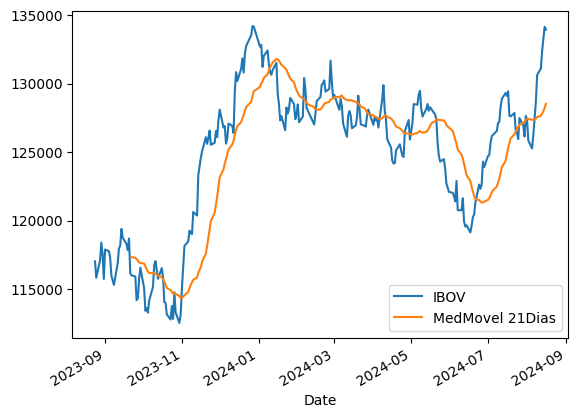

In [27]:
df_ibov.plot(label='IBOV')
media_movel = df_ibov.rolling(21).mean() #21 dias
media_movel.plot(label="MedMovel 21Dias")
plt.legend()
plt.show()